In [1]:
import pandas as pd
import numpy as np
# from geopy.geocoders import Nominatim
# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab


import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# # Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# # import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
print('Libraries imported.')

Libraries imported.


In [2]:
import pandas as pd
import numpy as np
# from geopy.geocoders import Nominatim
# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab


import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# # Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# # import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library
import requests
from bs4 import BeautifulSoup
print('Libraries imported.')

Libraries imported.


# Grabbing First Table with Super Neighborhood Names

In [3]:
df_houston = pd.read_html('https://en.wikipedia.org/wiki/List_of_Houston_neighborhoods')[0]
df_houston = df_houston.drop(columns=['#', 'Approximate boundaries'])
df_houston = df_houston.rename(columns={'Name': 'Super Neighborhood', 'Location relative to Downtown Houston':'Region'})
htx_areas = df_houston['Region'].unique().tolist()
htx_areas = ['Northwest', 'North', 'West', 'Southwest', 'South', 'Northeast', 'East', 'Southeast']
df_houston

,Super Neighborhood,Region
0,Willowbrook,Northwest
1,Greater Greenspoint,North
2,Carverdale,Northwest
3,Fairbanks / Northwest Crossing,Northwest
4,Greater Inwood,Northwest
...,...,...
83,Spring Branch North,Northwest
84,Spring Branch Central,Northwest
85,Spring Branch East,Northwest
86,Greenway / Upper Kirby,Southwest


In [4]:
#create list for super neighborhood names
htx_neighborhoods = df_houston['Super Neighborhood'].tolist()

In [5]:
nw_list = []
north_list = []
west_list = []
sw_list = []
south_list = []
ne_list = []
east_list = []
se_list = []

for index, row in df_houston.iterrows():
    if row['Region'] == 'Northwest':
        nw_list.append(row['Super Neighborhood'])
    if row['Region'] == 'North':
        north_list.append(row['Super Neighborhood'])
    if row['Region'] == 'West':
        west_list.append(row['Super Neighborhood'])
    if row['Region'] == 'Southwest':
        sw_list.append(row['Super Neighborhood'])
    if row['Region'] == 'South':
        south_list.append(row['Super Neighborhood'])
    if row['Region'] == 'Northeast':
        ne_list.append(row['Super Neighborhood'])
    if row['Region'] == 'East':
        east_list.append(row['Super Neighborhood'])
    if row['Region'] == 'Southeast':
        se_list.append(row['Super Neighborhood'])
# print(nw_list)
# nw_str = ', '.join(nw_list)
# print(nw_str)
# print(north_list)
# print(west_list)
# print(sw_list)
# print(south_list)
# print(ne_list)
# print(east_list)
# print(se_list)


In [6]:


df_group_nh = pd.DataFrame()
df_group_nh['Region'] = htx_areas
df_group_nh['Super Neighborhoods'] = 'default'
df_group_nh.at[0, 'Super Neighborhoods'] = nw_list
df_group_nh.at[1, 'Super Neighborhoods'] = north_list
df_group_nh.at[2, 'Super Neighborhoods'] = west_list
df_group_nh.at[3, 'Super Neighborhoods'] = sw_list
df_group_nh.at[4, 'Super Neighborhoods'] = south_list
df_group_nh.at[5, 'Super Neighborhoods'] = ne_list
df_group_nh.at[6, 'Super Neighborhoods'] = east_list
df_group_nh.at[7, 'Super Neighborhoods'] = se_list



df_group_nh

,Region,Super Neighborhoods
0,Northwest,"[Willowbrook, Carverdale, Fairbanks / Northwes..."
1,North,"[Greater Greenspoint, Hidden Valley, Independe..."
2,West,"[Westbranch, Addicks / Park Ten, Spring Branch..."
3,Southwest,"[Neartown / Montrose, Alief, Sharpstown, Gulft..."
4,South,"[Medical Center, Astrodome Area, South Main, C..."
5,Northeast,"[Kingwood, Lake Houston, Jensen, East Little Y..."
6,East,"[Denver Harbor / Port Houston, Pleasantville A..."
7,Southeast,"[Greater Eastwood, Harrisburg / Manchester, Gr..."



# Grabbing dataset with Houston Zip Codes and Area

In [7]:

dfs = pd.read_html('https://web.har.com/zipcode')
df_zip_codes = dfs[2]
df_zip_codes.rename(columns={0:'Zip Code',
                          1:'City Area',
                          2:'County', 3: 'Misc'}, 
                 inplace=True)
df_zip_codes = df_zip_codes.drop([0])
df_zip_codes = df_zip_codes.drop(columns=['Misc'])
df_zip_codes = df_zip_codes.reset_index(drop=True)

df_zip_codes



,Zip Code,City Area,County
0,77002,"Houston - Inner Loop (HOUSTON,CLUTCH CITY,)",HARRIS
1,77003,"Houston - Inner Loop (HOUSTON,)",HARRIS
2,77004,"Houston - Inner Loop (HOUSTON,)",HARRIS
3,77005,"Houston - Inner Loop (HOUSTON,SOUTHSIDE PLACE,...",HARRIS
4,77006,"Houston - Inner Loop (HOUSTON,)",HARRIS
...,...,...,...
214,77591,TEXAS CITY,GALVESTON
215,77598,"WEBSTER (FONDREN,WEBSTER,)",HARRIS
216,77617,"GILCHRIST (CAPLEN,GILCHRIST,)",GALVESTON
217,77623,HIGH ISLAND,GALVESTON


In [8]:
df_harris_county = df_zip_codes[df_zip_codes['County'].str.contains("HARRIS")].reset_index(drop=True)
df_harris_county

,Zip Code,City Area,County
0,77002,"Houston - Inner Loop (HOUSTON,CLUTCH CITY,)",HARRIS
1,77003,"Houston - Inner Loop (HOUSTON,)",HARRIS
2,77004,"Houston - Inner Loop (HOUSTON,)",HARRIS
3,77005,"Houston - Inner Loop (HOUSTON,SOUTHSIDE PLACE,...",HARRIS
4,77006,"Houston - Inner Loop (HOUSTON,)",HARRIS
...,...,...,...
128,77562,HIGHLANDS,HARRIS
129,77571,LA PORTE,HARRIS
130,77586,"SEABROOK (EL LAGO,SEABROOK,TAYLOR LAKE VILLAGE...",HARRIS
131,77587,SOUTH HOUSTON,HARRIS


In [9]:
df_harris_county_final = df_harris_county[df_harris_county['City Area'].str.contains("Northwest|North|West|Southwest|South|Northeast|East|Southeast")].reset_index(drop=True)
df_harris_county_final

,Zip Code,City Area,County
0,77013,"Houston - Northeast (HOUSTON,)",HARRIS
1,77014,"Houston - Northwest (HOUSTON,)",HARRIS
2,77015,"Houston - Northeast (CLOVERLEAF,GREENS BAYOU,H...",HARRIS
3,77016,"Houston - Northeast (HOUSTON,)",HARRIS
4,77017,"Houston - Southeast (HOUSTON,)",HARRIS
...,...,...,...
68,77093,"Houston - Northeast (HOUSTON,)",HARRIS
69,77094,"Houston - Southwest (HOUSTON,)",HARRIS
70,77095,"Houston - Northwest (HOUSTON,)",HARRIS
71,77096,"Houston - Southwest (HOUSTON,)",HARRIS


In [10]:
city_area_series = df_harris_county_final['City Area']
areas = []
for area in city_area_series:
    area_list = area.split('-')
    areas.append(area_list[1])
areas_series = pd.Series(areas)
areas_series

regions_list = []
for region in areas_series:
    regions = region.split('(')
    regions_list.append(regions[0])
df_harris_county_final['City Area'] = regions_list
df_harris_county_final['Super Neighborhoods'] = 'default'
df_harris_county_final

,Zip Code,City Area,County,Super Neighborhoods
0,77013,Northeast,HARRIS,default
1,77014,Northwest,HARRIS,default
2,77015,Northeast,HARRIS,default
3,77016,Northeast,HARRIS,default
4,77017,Southeast,HARRIS,default
...,...,...,...,...
68,77093,Northeast,HARRIS,default
69,77094,Southwest,HARRIS,default
70,77095,Northwest,HARRIS,default
71,77096,Southwest,HARRIS,default


In [11]:
for index, row in df_harris_county_final.iterrows():
    if row['City Area'].strip() == 'Northwest':
        df_harris_county_final.at[index, 'Super Neighborhoods'] = nw_list
    if row['City Area'].strip() == 'North':
        df_harris_county_final.at[index, 'Super Neighborhoods'] = north_list
    if row['City Area'].strip() == 'West':
        df_harris_county_final.at[index, 'Super Neighborhoods'] = west_list
    if row['City Area'].strip() == 'Southwest':
        df_harris_county_final.at[index, 'Super Neighborhoods'] = sw_list
    if row['City Area'].strip() == 'South':
        df_harris_county_final.at[index, 'Super Neighborhoods'] = south_list
    if row['City Area'].strip() == 'Northeast':
        df_harris_county_final.at[index, 'Super Neighborhoods'] = ne_list
    if row['City Area'].strip() == 'East':
        df_harris_county_final.at[index, 'Super Neighborhoods'] = east_list
    if row['City Area'].strip() == 'Southeast':
        df_harris_county_final.at[index, 'Super Neighborhoods'] = se_list
# df_harris_county_final = df_harris_county_final.drop(columns=['County'])
print(len(df_harris_county_final['Zip Code'].unique()))
# pd.set_option("display.max_rows", None, "display.max_columns", None)
city_area_list = df_harris_county_final['City Area'].tolist()
super_nb_list = df_harris_county_final['Super Neighborhoods'].tolist()
df_harris_county_final


73


,Zip Code,City Area,County,Super Neighborhoods
0,77013,Northeast,HARRIS,"[Kingwood, Lake Houston, Jensen, East Little Y..."
1,77014,Northwest,HARRIS,"[Willowbrook, Carverdale, Fairbanks / Northwes..."
2,77015,Northeast,HARRIS,"[Kingwood, Lake Houston, Jensen, East Little Y..."
3,77016,Northeast,HARRIS,"[Kingwood, Lake Houston, Jensen, East Little Y..."
4,77017,Southeast,HARRIS,"[Greater Eastwood, Harrisburg / Manchester, Gr..."
...,...,...,...,...
68,77093,Northeast,HARRIS,"[Kingwood, Lake Houston, Jensen, East Little Y..."
69,77094,Southwest,HARRIS,"[Neartown / Montrose, Alief, Sharpstown, Gulft..."
70,77095,Northwest,HARRIS,"[Willowbrook, Carverdale, Fairbanks / Northwes..."
71,77096,Southwest,HARRIS,"[Neartown / Montrose, Alief, Sharpstown, Gulft..."


# Grabbing third dataset with population info by zip code

In [12]:
df_tables = pd.read_html('http://zipatlas.com/us/tx/houston/zip-code-comparison/population-density.htm')
df_htx_pop = df_tables[11]

df_htx_pop.rename(columns={0:'#',
                          1:'Zip Code',
                          2:'Location', 3: 'City', 4: 'Population', 5: 'People/Sq. Mile', 6: 'National Rank'}, 
                 inplace=True)
df_htx_pop = df_htx_pop.drop([0])
df_htx_pop = df_htx_pop.drop(columns=['#', 'People/Sq. Mile', 'National Rank'])
df_htx_pop = df_htx_pop.reset_index(drop=True)

#clean our dataframe
location_series = df_htx_pop['Location']


lat_list = []
long_list = []

for location in location_series:
    location_list = location.split(',')
#     print(type(location_list))
    lat_list.append(location_list[0])
    long_list.append(location_list[1])

# print(lat_list)
# print(long_list)

df_htx_pop['Latitude'] = lat_list
df_htx_pop['Longitude'] = long_list
df_htx_pop = df_htx_pop.drop(columns=['Location'])

df_htx_copy = df_htx_pop.copy()

df_htx_copy = df_htx_copy.sort_values(by = "Zip Code").reset_index(drop=True)
#11-95
df_htx_copy = df_htx_copy[11:96].reset_index(drop=True)


# City of Houston Data Final

In [13]:
zips_to_drop = ['77019', '77020', '77021', '77023', '77025', '77026', '77027', '77030', '77046', '77052', '77053', '77054', '77097', '77098']
df_htx_copy = df_htx_copy[~df_htx_copy['Zip Code'].isin(zips_to_drop)].reset_index(drop=True)
# pd.set_option("display.max_rows", None, "display.max_columns", None)
zip_code_list = df_htx_copy['Zip Code'].tolist()
df_htx_copy['City Area'] = city_area_list
df_htx_copy['Super Neighborhoods'] = super_nb_list
df_htx_copy

,Zip Code,City,Population,Latitude,Longitude,City Area,Super Neighborhoods
0,77013,"Houston, Texas",18378,29.791808,-95.228991,Northeast,"[Kingwood, Lake Houston, Jensen, East Little Y..."
1,77014,"Houston, Texas",20706,29.981209,-95.463971,Northwest,"[Willowbrook, Carverdale, Fairbanks / Northwes..."
2,77015,"Houston, Texas",50569,29.765809,-95.175116,Northeast,"[Kingwood, Lake Houston, Jensen, East Little Y..."
3,77016,"Houston, Texas",29753,29.863166,-95.298522,Northeast,"[Kingwood, Lake Houston, Jensen, East Little Y..."
4,77017,"Houston, Texas",32823,29.692600,-95.252270,Southeast,"[Greater Eastwood, Harrisburg / Manchester, Gr..."
...,...,...,...,...,...,...,...
68,77093,"Houston, Texas",45908,29.863400,-95.341409,Northeast,"[Kingwood, Lake Houston, Jensen, East Little Y..."
69,77094,"Houston, Texas",7779,29.769285,-95.681292,Southwest,"[Neartown / Montrose, Alief, Sharpstown, Gulft..."
70,77095,"Houston, Texas",39275,29.916055,-95.663077,Northwest,"[Willowbrook, Carverdale, Fairbanks / Northwes..."
71,77096,"Houston, Texas",33987,29.674133,-95.478354,Southwest,"[Neartown / Montrose, Alief, Sharpstown, Gulft..."


In [14]:
latitude = df_htx_copy.at[1, 'Latitude']
longitude = df_htx_copy.at[1, 'Longitude']
print(latitude)
print(longitude)

29.981209
 -95.463971


# Plotting the Zip Codes in Houston, TX

In [15]:
map_htx = folium.Map(location=[latitude, longitude], zoom_start=12)
for lat, lng in zip(
        df_htx_copy['Latitude'], 
        df_htx_copy['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=0.7,
        parse_html=False).add_to(map_htx)  

map_htx

# Using Foursquare to Locate BBQ Venues in Houston, TX

In [16]:
#getting houston zipcode
address = 'Houston, TX'

geolocator = Nominatim(user_agent="houston_explorer")
location = geolocator.geocode(address)
latitude_htx = location.latitude
longitude_htx = location.longitude
print('The geograpical coordinate of Houston are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Houston are 29.981209,  -95.463971.


In [17]:
CLIENT_ID = 'URRXSMCT3DUXLHHN5MJ4HWVE2H1DUVNP4WJC2D3JOQHUPA2Y' # your Foursquare ID
CLIENT_SECRET = 'O05UCBYUAD0L5K2NQQYDVO32HOTW0F13F1GVS5OOY5GXNZNP' # your Foursquare Secret
VERSION = '20200616' # Foursquare API version

In [18]:
zip_code = df_htx_copy.loc[0, 'Zip Code']
print('The first zip code in Houston is ', zip_code)

The first zip code in Houston is  77013


In [19]:
zip_code_lat = df_htx_copy.loc[0, 'Latitude']
# latitude_htx # neighborhood latitude value
zip_code_long = df_htx_copy.loc[0, 'Longitude']
# longitude_htx # neighborhood longitude value

print('The latitude and longitude values of', zip_code, 'are', zip_code_lat, 'and', zip_code_long)

The latitude and longitude values of 77013 are 29.791808 and  -95.228991


In [20]:
LIMIT = 300 # limit of number of venues returned by Foursquare API
radius = 10000 # define radius
query = 'barbecue'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    zip_code_lat, 
    zip_code_long, 
    radius, 
    LIMIT,
    query)
results = requests.get(url).json()
print(results)

{'meta': {'code': 200, 'requestId': '60050af8cb7cea4da45f6740'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': '$-$$$$', 'key': 'price'}]}, 'headerLocation': 'Houston', 'headerFullLocation': 'Houston', 'headerLocationGranularity': 'city', 'query': 'barbecue', 'totalResults': 13, 'suggestedBounds': {'ne': {'lat': 29.88180809000009, 'lng': -95.125478357378}, 'sw': {'lat': 29.70180790999991, 'lng': -95.33250364262199}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '53559bc9498e865604ab1ec1', 'name': "Pappa's Bar B Q", 'location': {'address': '12424 East Fwy', 'lat': 29.76989, 'lng': -95.21717, 'labeledLatLngs': [{'label': 'display', 'lat': 29.76989, 'lng': -95.21717}, {'label': 'entrance', 'lat': 29.769805, 'lng': -95.216344}], 'distance': 2693, 'postalCode': '77015', 'cc': 'US

In [21]:
def get_category(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
close_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
close_venues = close_venues.loc[:, filtered_columns]

# filter the category for each row
close_venues['venue.categories'] = close_venues.apply(get_category, axis=1)

# clean columns
close_venues.columns = [col.split(".")[-1] for col in close_venues.columns]

close_venues

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,name,categories,lat,lng
0,Pappa's Bar B Q,BBQ Joint,29.769890,-95.217170
1,R & K Barbeque,BBQ Joint,29.773785,-95.205646
2,Triple J's Smokehouse,BBQ Joint,29.819326,-95.302234
3,Brother-In-Law's BBQ,BBQ Joint,29.787817,-95.178089
4,No Name BBQ,BBQ Joint,29.712515,-95.200784
5,Dickey's Barbecue Pit,BBQ Joint,29.847920,-95.308355
6,Wallisville BBQ Cook-off,BBQ Joint,29.805492,-95.194244
7,Junior's Texas Bar-B-Q and Seafood,BBQ Joint,29.789683,-95.278349
8,J and S Bar-b-Que,BBQ Joint,29.837856,-95.261904
9,Jeff's Kitchen,BBQ Joint,29.837890,-95.261902


In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=20000):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            query)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zip Code', 
                  'Zip Code Latitude', 
                  'Zip Code Longitude', 
                  'Venue Name', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
houston_BBQ = getNearbyVenues(names=df_htx_copy['Zip Code'],
                                   latitudes=df_htx_copy['Latitude'],
                                   longitudes=df_htx_copy['Longitude']
                                  )


In [25]:
pd.set_option('display.max_rows', None)
houston_BBQ


,Zip Code,Zip Code Latitude,Zip Code Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,77013,29.791808,-95.228991,Pappa's Bar B Q,29.769890,-95.217170,BBQ Joint
1,77013,29.791808,-95.228991,R & K Barbeque,29.773785,-95.205646,BBQ Joint
2,77013,29.791808,-95.228991,Triple J's Smokehouse,29.819326,-95.302234,BBQ Joint
3,77013,29.791808,-95.228991,Tony's BBQ,29.800848,-95.124304,BBQ Joint
4,77013,29.791808,-95.228991,Pinkerton's Barbecue,29.798694,-95.381641,BBQ Joint
5,77013,29.791808,-95.228991,Jackson Street BBQ,29.758972,-95.354267,BBQ Joint
6,77013,29.791808,-95.228991,Pappas Bar-B-Q,29.700510,-95.294410,BBQ Joint
7,77013,29.791808,-95.228991,Ray's BBQ Shack,29.702710,-95.356619,BBQ Joint
8,77013,29.791808,-95.228991,Gyu-Kaku Japanese BBQ,29.750747,-95.375275,BBQ Joint
9,77013,29.791808,-95.228991,Pappas Bar-B-Q,29.815303,-95.374125,BBQ Joint


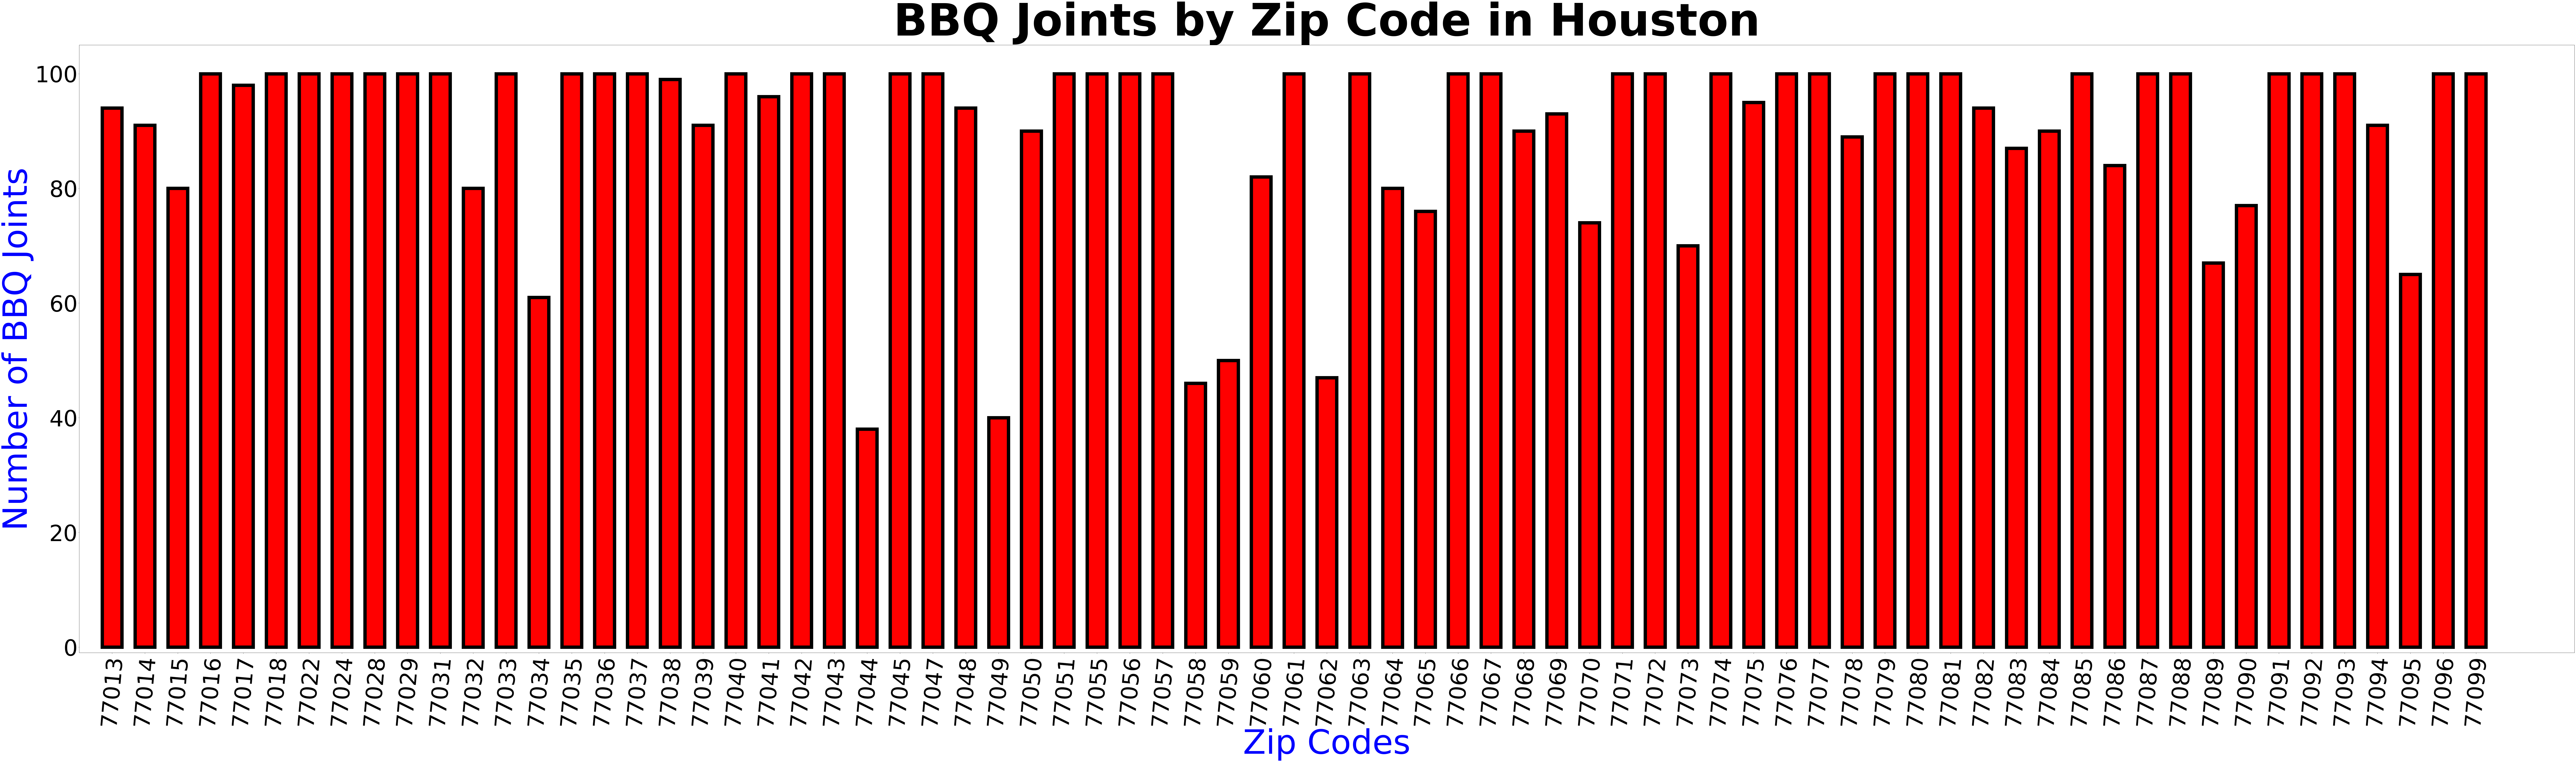

In [26]:
plt.figure(figsize = (200,50))
values_series = houston_BBQ['Zip Code'].value_counts().sort_index()
plot_dict = values_series.to_dict()
list_keys = list(plot_dict.keys())
list_values = list(plot_dict.values())
ypos = np.arange(len(list_keys))
plt.xlim([-1, 75])
plt.ylim([-1, 105])
plt.title('BBQ Joints by Zip Code in Houston', fontsize=200,fontweight="bold")
plt.xlabel('Zip Codes', fontsize=150,color='blue')
plt.ylabel('Number of BBQ Joints', fontsize=150, color='blue')
plt.bar(ypos, list_values, width= 0.6, align='center',color='red', edgecolor = 'black',linewidth=15)
plt.xticks(range(len(plot_dict)), plot_dict.keys(), fontsize=100, rotation=85)
plt.yticks(fontsize=100)
plt.show()





# Checking how many BBQ venues we got in the Houston

In [27]:
houston_BBQ.groupby('Zip Code').count()


,Zip Code Latitude,Zip Code Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
Zip Code,,,,,,
77013,94,94,94,94,94,94
77014,91,91,91,91,91,91
77015,80,80,80,80,80,80
77016,100,100,100,100,100,100
77017,98,98,98,98,98,98
77018,100,100,100,100,100,100
77022,100,100,100,100,100,100
77024,100,100,100,100,100,100
77028,100,100,100,100,100,100


In [28]:
print('There are' , len(houston_BBQ['Venue Name'].unique()), 'categories')

There are 315 categories


In [29]:
houston_BBQ['Venue Name'].unique()

array(["Pappa's Bar B Q", 'R & K Barbeque', "Triple J's Smokehouse",
       "Tony's BBQ", "Pinkerton's Barbecue", 'Jackson Street BBQ',
       'Pappas Bar-B-Q', "Ray's BBQ Shack", 'Gyu-Kaku Japanese BBQ',
       "Andy's Hawg Wild BBQ", 'The Pit Room', 'El Burro & The Bull',
       'Truth Barbeque', "Brother-In-Law's BBQ", '4 Corners BBQ',
       'Goode Company BBQ', 'Pappas Bbq', 'Brookstreet Bar-B-Q',
       'OMG BBQ', 'Gatlins BBQ', 'Barbecue Inn', "Pizzitola's BBQ",
       'Hungry Farmer', 'No Name BBQ', "Goode's Armadillo Palace",
       'Demeris Bar-B-Q', "Abdel's BBQ", "Dickey's Barbecue Pit",
       "Otto's BBQ", 'Pappas Burger', 'Cattle Drive BBQ', 'Village BBQ',
       "Gabby's BBQ", "King's BBQ", 'Oh My Gogi! Truck',
       'Texas BBQ House', 'Cullen Oaks', "Buster's BBQ", "Barnaby's Cafe",
       'Wallisville BBQ Cook-off', 'Grand Prize BBQ',
       'Brown Sugars Bar-B-Que', 'J and S Bar-b-Que',
       "Sam's Fried Chicken & Donuts", "Mia's Table", "Hoot's Smokehouse",
     

In [30]:
 #one hot encoding
htx_venues_onehot = pd.get_dummies(houston_BBQ[['Venue Name']], prefix="", prefix_sep="")

# add zip code column back to dataframe
htx_venues_onehot['Zip Code'] = houston_BBQ['Zip Code'] 


# move zip code column to the first column
fixed_columns = [htx_venues_onehot.columns[-1]] + list(htx_venues_onehot.columns[:-1])
htx_venues_onehot = htx_venues_onehot[fixed_columns]

htx_venues_onehot.head()

,Zip Code,"""Gringobaby's Barbecue and Beer Emporium"" (which suspiciously resembles Cafe' de la Paix)",2 Guys 1 Pit Bbq,3rd Coast BBQ,4 Corners BBQ,529-BBQ,75 BBQ and Hot Pot Buffet 休斯顿火锅烧烤自助餐,AJ's Meat Market & Smokehouse,Abdel's BBQ,Aloha Hawaiian BBQ,...,Wild West BBQ,Willows Texas Barbecue,Wings 'n Things,Woodshed Smokehouse Houston,World Class Burgers & Bar B-Q,Xin Jiang BBQ,brooks bbq,frenchy's lee road,green seed vegan,holy smokes bbq
0,77013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,77013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,77013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,77013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
bbq_grouped = htx_venues_onehot.groupby('Zip Code').mean().reset_index()
bbq_grouped.head()


,Zip Code,"""Gringobaby's Barbecue and Beer Emporium"" (which suspiciously resembles Cafe' de la Paix)",2 Guys 1 Pit Bbq,3rd Coast BBQ,4 Corners BBQ,529-BBQ,75 BBQ and Hot Pot Buffet 休斯顿火锅烧烤自助餐,AJ's Meat Market & Smokehouse,Abdel's BBQ,Aloha Hawaiian BBQ,...,Wild West BBQ,Willows Texas Barbecue,Wings 'n Things,Woodshed Smokehouse Houston,World Class Burgers & Bar B-Q,Xin Jiang BBQ,brooks bbq,frenchy's lee road,green seed vegan,holy smokes bbq
0,77013,0.000000,0.000000,0.000000,0.010638,0.000000,0.0,0.0,0.010638,0.0,...,0.0,0.010638,0.0,0.010638,0.0,0.0,0.010638,0.010638,0.010638,0.0000
1,77014,0.010989,0.010989,0.010989,0.000000,0.010989,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.010989,0.000000,0.0000
2,77015,0.000000,0.000000,0.000000,0.012500,0.000000,0.0,0.0,0.012500,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.012500,0.000000,0.012500,0.0125
3,77016,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.010000,0.0,...,0.0,0.000000,0.0,0.010000,0.0,0.0,0.010000,0.000000,0.010000,0.0000
4,77017,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.010204,0.0,...,0.0,0.000000,0.0,0.010204,0.0,0.0,0.010204,0.000000,0.010204,0.0000


In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Zip Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
zip_code_bbq_sorted = pd.DataFrame(columns=columns)
zip_code_bbq_sorted['Zip Code'] = bbq_grouped['Zip Code']

for ind in np.arange(bbq_grouped.shape[0]):
    zip_code_bbq_sorted.iloc[ind, 1:] = return_most_common_venues(bbq_grouped.iloc[ind, :], num_top_venues)

zip_code_bbq_sorted.head()

,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,77013,Pappas Bar-B-Q,Tony's BBQ,Brisket Bar-B-Q,El Burro & The Bull,Mia's Table,Buster's BBQ,Burns BBQ & Catering,Sam's Fried Chicken & Donuts,EL TACONAZO GRILL,Buck’s Barbeque
1,77014,Pappas Bar-B-Q,Dickey's Barbecue Pit,SouthernQ,Spring Creek Barbeque,Thomas Bar-B-Q,Brookwood Farms,Rudy's Country Store And Bar-B-Q,Mo's BBQ,Rango's Bbq,Country Time Barbecue
2,77015,Pappas Bar-B-Q,Dickey's Barbecue Pit,King's BBQ,Tony's BBQ,holy smokes bbq,No Name BBQ,Gyu-Kaku Japanese BBQ,Hoot's Smokehouse,Hoppie's,J and S Bar-b-Que
3,77016,Pappas Bar-B-Q,Demeris Bar-B-Q,Mo's BBQ,Brookwood Farms,R&W BBQ,Burns Orginal BBQ Est. 1973,Burns Old Fashioned Pit Bar-B-Q,Burns BBQ & Catering,Logan's Roadhouse,Buck’s Barbeque
4,77017,Pappas Bar-B-Q,Dickey's Barbecue Pit,Tony's BBQ,R & K Barbeque,Skeets Bar-B-Q,Cattle Drive BBQ,Luther's Barbeque,Cal's BBQ & More,Buster's BBQ,Sagemont Smoked Meats & Bar


# Finding the best K to use for K Means

# Clustering by Zip Code

In [33]:
kclusters = 5

kl_clustering = bbq_grouped.drop(["Zip Code"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kl_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([3, 4, 3, 3, 3, 1, 1, 1, 3, 3, 2, 4, 1, 0, 1, 1, 3, 4, 3, 1, 2, 1,
       1, 3, 1, 1, 3, 0, 3, 1, 1, 1, 1, 0, 0, 4, 3, 0, 1, 4, 4, 4, 4, 4,
       4, 4, 1, 2, 4, 1, 3, 3, 2, 3, 2, 1, 1, 2, 2, 2, 1, 4, 3, 3, 0, 4,
       1, 1, 3, 2, 4, 1, 2], dtype=int32)

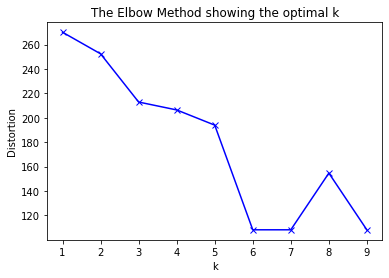

In [34]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(kl_clustering)
    distortions.append(sum(np.min(cdist(kl_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / kl_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [35]:
# create a new dataframe that includes the cluster as well as the top 10 BBQ Joints for each neighborhood.

zip_code_bbq_sorted.insert(1, 'Cluster Labels', kmeans.labels_)
# zip_code_bbq_sorted['Cluster Labels'] = kmeans.labels_

In [36]:
zip_code_bbq_sorted.head()

,Zip Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,77013,3,Pappas Bar-B-Q,Tony's BBQ,Brisket Bar-B-Q,El Burro & The Bull,Mia's Table,Buster's BBQ,Burns BBQ & Catering,Sam's Fried Chicken & Donuts,EL TACONAZO GRILL,Buck’s Barbeque
1,77014,4,Pappas Bar-B-Q,Dickey's Barbecue Pit,SouthernQ,Spring Creek Barbeque,Thomas Bar-B-Q,Brookwood Farms,Rudy's Country Store And Bar-B-Q,Mo's BBQ,Rango's Bbq,Country Time Barbecue
2,77015,3,Pappas Bar-B-Q,Dickey's Barbecue Pit,King's BBQ,Tony's BBQ,holy smokes bbq,No Name BBQ,Gyu-Kaku Japanese BBQ,Hoot's Smokehouse,Hoppie's,J and S Bar-b-Que
3,77016,3,Pappas Bar-B-Q,Demeris Bar-B-Q,Mo's BBQ,Brookwood Farms,R&W BBQ,Burns Orginal BBQ Est. 1973,Burns Old Fashioned Pit Bar-B-Q,Burns BBQ & Catering,Logan's Roadhouse,Buck’s Barbeque
4,77017,3,Pappas Bar-B-Q,Dickey's Barbecue Pit,Tony's BBQ,R & K Barbeque,Skeets Bar-B-Q,Cattle Drive BBQ,Luther's Barbeque,Cal's BBQ & More,Buster's BBQ,Sagemont Smoked Meats & Bar


In [37]:
kl_merged = zip_code_bbq_sorted
kl_merged['Latitude'] = df_htx_copy['Latitude']
kl_merged['Longitude'] = df_htx_copy['Longitude']
kl_merged 

,Zip Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,77013,3,Pappas Bar-B-Q,Tony's BBQ,Brisket Bar-B-Q,El Burro & The Bull,Mia's Table,Buster's BBQ,Burns BBQ & Catering,Sam's Fried Chicken & Donuts,EL TACONAZO GRILL,Buck’s Barbeque,29.791808,-95.228991
1,77014,4,Pappas Bar-B-Q,Dickey's Barbecue Pit,SouthernQ,Spring Creek Barbeque,Thomas Bar-B-Q,Brookwood Farms,Rudy's Country Store And Bar-B-Q,Mo's BBQ,Rango's Bbq,Country Time Barbecue,29.981209,-95.463971
2,77015,3,Pappas Bar-B-Q,Dickey's Barbecue Pit,King's BBQ,Tony's BBQ,holy smokes bbq,No Name BBQ,Gyu-Kaku Japanese BBQ,Hoot's Smokehouse,Hoppie's,J and S Bar-b-Que,29.765809,-95.175116
3,77016,3,Pappas Bar-B-Q,Demeris Bar-B-Q,Mo's BBQ,Brookwood Farms,R&W BBQ,Burns Orginal BBQ Est. 1973,Burns Old Fashioned Pit Bar-B-Q,Burns BBQ & Catering,Logan's Roadhouse,Buck’s Barbeque,29.863166,-95.298522
4,77017,3,Pappas Bar-B-Q,Dickey's Barbecue Pit,Tony's BBQ,R & K Barbeque,Skeets Bar-B-Q,Cattle Drive BBQ,Luther's Barbeque,Cal's BBQ & More,Buster's BBQ,Sagemont Smoked Meats & Bar,29.692600,-95.252270
5,77018,1,Pappas Bar-B-Q,Demeris Bar-B-Q,The Brisket House,Buck’s Barbeque,Rudy's Country Store And Bar-B-Q,Lucky Palace Korean Restaurant,El Burro & The Bull,Burns Orginal BBQ Est. 1973,Logan's Roadhouse,Sam's Fried Chicken & Donuts,29.826448,-95.426267
6,77022,1,Pappas Bar-B-Q,Demeris Bar-B-Q,Demeris BBQ,Fainmous BBQ,Buck’s Barbeque,Pizzitola's BBQ,Brown Sugar's BBQ,Kot Dae Ji - Flower Piggy Korean BBQ,Brookwood Farms,Smokey Cheeks,29.831590,-95.379553
7,77024,1,Pappas Bar-B-Q,Demeris Bar-B-Q,Brisket Bar-B-Q,Gabby's BBQ,Lucky Palace Korean Restaurant,Fainmous BBQ,Logan's Roadhouse,Burns Orginal BBQ Est. 1973,Sam's Fried Chicken & Donuts,Sinh Sinh,29.771991,-95.515453
8,77028,3,Pappas Bar-B-Q,Demeris Bar-B-Q,Brookwood Farms,Coaches Pub,Sam's Fried Chicken & Donuts,Mockingbird Distillery & Smokehouse,Mo's BBQ,Miller Lite Tent HLSR,Dickey's Barbecue Pit,Mia's Table,29.825122,-95.286360
9,77029,3,Pappas Bar-B-Q,Demeris Bar-B-Q,Tony's BBQ,Junior's Texas Bar-B-Q and Seafood,Charlie's BBQ & Hamburgers,Miller Lite Tent HLSR,Cattle Drive BBQ,Mia's Table,Cal's BBQ & More,Buster's BBQ,29.764519,-95.265896


In [38]:
print(kl_merged.shape)
kl_merged.sort_values(["Cluster Labels"], inplace=True)
k1_merged = kl_merged.reset_index(drop=True)
k1_merged

(73, 14)


,Zip Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,77062,0,Pappas Bar-B-Q,Dickey's Barbecue Pit,Hoppie's,Rudy's Country Store And BBQ,The Rig at Waller County Line BBQ,Clear Lake Elks Lodge 2322,Grand Prize BBQ,Logan's Roadhouse,Pappas Bbq,Ryans Smokehouse BBQ,29.575781,-95.134334
1,77049,0,Dickey's Barbecue Pit,King's BBQ,Tony's BBQ,holy smokes bbq,Jeff's Kitchen,Spring Creek Barbeque,Spring Creek BBQ,Smashburger,Sluggs BBQ,R & K Barbeque,29.832928,-95.149040
2,77059,0,Pappas Bar-B-Q,Dickey's Barbecue Pit,Hoppie's,No Name BBQ,T-Bone Tom's,Old Fashion Barbeque,Brother-In-Law's BBQ,Brown Sugars Bar-B-Que,Spring Creek BBQ,Buster's BBQ,29.615219,-95.134960
3,77058,0,Pappas Bar-B-Q,Dickey's Barbecue Pit,No Name BBQ,Pappas Burger,Rudy's Country Store And BBQ,Pappas Delta Blues Smokehouse,The Rig at Waller County Line BBQ,Clear Lake Elks Lodge 2322,Logan's Roadhouse,Grand Prize BBQ,29.561579,-95.099626
4,77034,0,Pappas Bar-B-Q,Dickey's Barbecue Pit,Cal's BBQ & More,Sagemont Smoked Meats & Bar,Dickey’s Barbecue Pit,Central Texas Bar-B-Q,Cattle Drive BBQ,Skeets BBQ,Skeets Bar-B-Q,Buster's BBQ,29.621703,-95.206676
5,77089,0,Pappas Bar-B-Q,Spring Creek BBQ,Dickey's Barbecue Pit,Cattle Drive BBQ,Cal's BBQ & More,Skeets BBQ,Skeets Bar-B-Q,Buster's BBQ,No Name BBQ,Mr. B’s Grub Shack,29.588469,-95.218012
6,77043,1,Pappas Bar-B-Q,Old Hickory Inn,Demeris Bar-B-Q,"""Gringobaby's Barbecue and Beer Emporium"" (whi...",Cottonwood,Oh My Gogi! Truck,Onion Creek,Dickey's Barbeque Pit,Otto's Barbeque And Burgers,Demeris BBQ,29.806532,-95.567179
7,77047,1,Pappas Bar-B-Q,Brisket Bar-B-Q,Spring Creek BBQ,Farr Better Bar B Que,Skeets Bar-B-Q,Luther's Barbeque,Roegels Barbecue Co.,Luling City Market,Cal's BBQ & More,Lucky Palace Korean Restaurant,29.610638,-95.385224
8,77081,1,Pappas Bar-B-Q,Demeris Bar-B-Q,Coaches Pub,Smokey Cheeks,Dirrty Swamp Cookers Tent,OMG BBQ,Oh My Gogi! Truck,Old Hickory Inn,Old Hickory Inn Barbecue,Onion Creek,29.712099,-95.480935
9,77080,1,Pappas Bar-B-Q,Thomas Bar-B-Q,Demeris Bar-B-Q,"""Gringobaby's Barbecue and Beer Emporium"" (whi...",El Burro & The Bull,EL TACONAZO GRILL,OMG BBQ,Oh My Gogi! Truck,Old Hickory Inn,Onion Creek,29.815893,-95.522964


In [39]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kl_merged['Latitude'], kl_merged['Longitude'], kl_merged['Zip Code'], kl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [40]:
kl_merged.loc[kl_merged['Cluster Labels'] == 0].reset_index(drop=True)

,Zip Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,77062,0,Pappas Bar-B-Q,Dickey's Barbecue Pit,Hoppie's,Rudy's Country Store And BBQ,The Rig at Waller County Line BBQ,Clear Lake Elks Lodge 2322,Grand Prize BBQ,Logan's Roadhouse,Pappas Bbq,Ryans Smokehouse BBQ,29.575781,-95.134334
1,77049,0,Dickey's Barbecue Pit,King's BBQ,Tony's BBQ,holy smokes bbq,Jeff's Kitchen,Spring Creek Barbeque,Spring Creek BBQ,Smashburger,Sluggs BBQ,R & K Barbeque,29.832928,-95.149040
2,77059,0,Pappas Bar-B-Q,Dickey's Barbecue Pit,Hoppie's,No Name BBQ,T-Bone Tom's,Old Fashion Barbeque,Brother-In-Law's BBQ,Brown Sugars Bar-B-Que,Spring Creek BBQ,Buster's BBQ,29.615219,-95.134960
3,77058,0,Pappas Bar-B-Q,Dickey's Barbecue Pit,No Name BBQ,Pappas Burger,Rudy's Country Store And BBQ,Pappas Delta Blues Smokehouse,The Rig at Waller County Line BBQ,Clear Lake Elks Lodge 2322,Logan's Roadhouse,Grand Prize BBQ,29.561579,-95.099626
4,77034,0,Pappas Bar-B-Q,Dickey's Barbecue Pit,Cal's BBQ & More,Sagemont Smoked Meats & Bar,Dickey’s Barbecue Pit,Central Texas Bar-B-Q,Cattle Drive BBQ,Skeets BBQ,Skeets Bar-B-Q,Buster's BBQ,29.621703,-95.206676
5,77089,0,Pappas Bar-B-Q,Spring Creek BBQ,Dickey's Barbecue Pit,Cattle Drive BBQ,Cal's BBQ & More,Skeets BBQ,Skeets Bar-B-Q,Buster's BBQ,No Name BBQ,Mr. B’s Grub Shack,29.588469,-95.218012


In [41]:
kl_merged.loc[kl_merged['Cluster Labels'] == 1].reset_index(drop=True)

,Zip Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,77043,1,Pappas Bar-B-Q,Old Hickory Inn,Demeris Bar-B-Q,"""Gringobaby's Barbecue and Beer Emporium"" (whi...",Cottonwood,Oh My Gogi! Truck,Onion Creek,Dickey's Barbeque Pit,Otto's Barbeque And Burgers,Demeris BBQ,29.806532,-95.567179
1,77047,1,Pappas Bar-B-Q,Brisket Bar-B-Q,Spring Creek BBQ,Farr Better Bar B Que,Skeets Bar-B-Q,Luther's Barbeque,Roegels Barbecue Co.,Luling City Market,Cal's BBQ & More,Lucky Palace Korean Restaurant,29.610638,-95.385224
2,77081,1,Pappas Bar-B-Q,Demeris Bar-B-Q,Coaches Pub,Smokey Cheeks,Dirrty Swamp Cookers Tent,OMG BBQ,Oh My Gogi! Truck,Old Hickory Inn,Old Hickory Inn Barbecue,Onion Creek,29.712099,-95.480935
3,77080,1,Pappas Bar-B-Q,Thomas Bar-B-Q,Demeris Bar-B-Q,"""Gringobaby's Barbecue and Beer Emporium"" (whi...",El Burro & The Bull,EL TACONAZO GRILL,OMG BBQ,Oh My Gogi! Truck,Old Hickory Inn,Onion Creek,29.815893,-95.522964
4,77051,1,Pappas Bar-B-Q,Demeris Bar-B-Q,Coaches Pub,Skeets Bar-B-Q,Dirrty Swamp Cookers Tent,Roegels Barbecue Co.,Luther's Barbeque,Luling City Market,Cal's BBQ & More,Buster's BBQ,29.663567,-95.375573
5,77056,1,Pappas Bar-B-Q,Brisket Bar-B-Q,Demeris Bar-B-Q,Fainmous BBQ,Luther's Barbeque,Rudy's Country Store And Bar-B-Q,Luling City Market,El Burro & The Bull,Lucky Palace Korean Restaurant,Burns Orginal BBQ Est. 1973,29.749035,-95.469021
6,77045,1,Pappas Bar-B-Q,Brisket Bar-B-Q,Spring Creek BBQ,Demeris Bar-B-Q,Skeets Bar-B-Q,Roegels Barbecue Co.,Cal's BBQ & More,Lucky Palace Korean Restaurant,Dirrty Swamp Cookers Tent,Sam's Fried Chicken & Donuts,29.637640,-95.425544
7,77057,1,Pappas Bar-B-Q,Brisket Bar-B-Q,Demeris Bar-B-Q,Eats Mesquite Grill,Kot Dae Ji - Flower Piggy Korean BBQ,Rudy's Country Store And Bar-B-Q,Lucky Palace Korean Restaurant,Burns Orginal BBQ Est. 1973,Sam's Fried Chicken & Donuts,Sausage On A Stick,29.744068,-95.489210
8,77096,1,Pappas Bar-B-Q,Spring Creek BBQ,Demeris Bar-B-Q,Lyndon's Pit BBQ,Mia's Table,Miller Lite Tent HLSR,Dirrty Swamp Cookers Tent,OMG BBQ,Oh My Gogi! Truck,Old Hickory Inn,29.674133,-95.478354
9,77063,1,Pappas Bar-B-Q,Demeris Bar-B-Q,Gyu-Kaku,Kit's Kitchen,Logan's Roadhouse,Rudy's Country Store And Bar-B-Q,El Burro & The Bull,Burns Orginal BBQ Est. 1973,Kot Dae Ji - Flower Piggy Korean BBQ,Sam's Fried Chicken & Donuts,29.736295,-95.523292


In [42]:
kl_merged.loc[kl_merged['Cluster Labels'] == 2].reset_index(drop=True)

,Zip Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,77094,2,Pappas Bar-B-Q,Big Daddy's BBQ,Spring Creek Barbeque,Dickey's Barbeque Pit,Brookstreet Barbecue,Smoked N Chopped Bbq,Dickey's Barbecue Pit,Otto's Barbeque And Burgers,Papa Joe's Grill,Demeris BBQ,29.769285,-95.681292
1,77077,2,Pappas Bar-B-Q,Thomas Bar-B-Q,Old Hickory Inn,Dickey's Barbeque Pit,Spring Creek Barbeque,Big Daddy's BBQ,Smokey Cheeks,Burns Old Fashioned Pit Bar-B-Q,Rudy's Country Store And Bar-B-Q,Rudy's Country Store and Bar-B-Q,29.749158,-95.620344
2,77079,2,Pappas Bar-B-Q,Old Hickory Inn,Thomas Bar-B-Q,Dickey's Barbeque Pit,Big Daddy's BBQ,Demeris Bar-B-Q,Ragin Cajun,Pete's Fine Meats,Eats Mesquite Grill,Nonmacher's Bar-B-Q,29.774523,-95.601071
3,77041,2,Spring Creek Barbeque,Pappas Bar-B-Q,Big Daddy's BBQ,The Brisket House,Thomas Bar-B-Q,"""Gringobaby's Barbecue and Beer Emporium"" (whi...",Pizzitola's BBQ,Demeris BBQ,Papa Joe's Grill,Dave's Rib Shack,29.857989,-95.585771
4,77031,2,Pappas Bar-B-Q,Old Hickory Inn,Demeris Bar-B-Q,Gyu-Kaku Japanese BBQ,green seed vegan,Roegels Barbecue Co.,Kit's Kitchen,Fainmous BBQ,Rudy's Country Store and Bar-B-Q,Sausage On A Stick,29.652205,-95.546230
5,77084,2,Pappas Bar-B-Q,Big Daddy's BBQ,Spring Creek Barbeque,Dickey's Barbeque Pit,Demeris BBQ,Old Hickory Inn,Papa Joe's Grill,Demeris Bar-B-Q,Dac Hung BBQ,D -Luxe BBQ and Catering,29.826860,-95.650860
6,77082,2,Pappas Bar-B-Q,Spring Creek Barbeque,Old Hickory Inn,Dickey's Barbeque Pit,Rudy's Country Store and Bar-B-Q,Brookstreet Bar-b-q,Fainmous BBQ,Kot Dae Ji - Flower Piggy Korean BBQ,Sinh Sinh,Skeeter's,29.724490,-95.640002
7,77072,2,Pappas Bar-B-Q,Old Hickory Inn,Rudy's Country Store and Bar-B-Q,Demeris Bar-B-Q,Charlie's BBQ & Hamburgers,Cougar Cookers,Dirrty Swamp Cookers Tent,Dickey's Barbeque Pit,Nonmacher's Bar-B-Q,Oh My Gogi! Truck,29.699688,-95.584817
8,77083,2,Spring Creek Barbeque,Pappas Bar-B-Q,Old Hickory Inn,Big Daddy's BBQ,Rudy's Country Store and Bar-B-Q,Dickey's Barbeque Pit,Chuckwagon BBQ & Burgers,Chopped n Smoked BBQ Food Truck (Halal),Papa Joe's Grill,Dac Hung BBQ,29.693991,-95.647830
9,77099,2,Pappas Bar-B-Q,Dirrty Swamp Cookers Tent,Demeris Bar-B-Q,Rudy's Country Store and Bar-B-Q,Old Hickory Inn,Smokey Cheeks,Kit's Kitchen,Fainmous BBQ,Sausage On A Stick,Sinh Sinh,29.670869,-95.585990


In [43]:
kl_merged.loc[kl_merged['Cluster Labels'] == 3].reset_index(drop=True) 

,Zip Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,77087,3,Pappas Bar-B-Q,Demeris Bar-B-Q,Dickey's Barbecue Pit,Happy Endings,Sausage On A Stick,Mia's Table,Charlie's Old Fashioned BBQ,Charlie's BBQ & Hamburgers,Central Texas Bar-B-Q,Dirrty Swamp Cookers Tent,29.685621,-95.304159
1,77093,3,Pappas Bar-B-Q,Brookwood Farms,Mo's BBQ,Eats Mesquite Grill,Demeris Bar-B-Q,Brookstreet Bar-B-Q,Logan's Roadhouse,EL TACONAZO GRILL,Smokey Cheeks,Southern Q BBQ,29.863400,-95.341409
2,77078,3,Pappas Bar-B-Q,Brookwood Farms,Mo's BBQ,Sticky's Chicken,El Real Tex-Mex Cafe,Evenings on the Esplanade,LENOX BARBECUE AND CATERING SERVICE INC.,Q Bar,Spring Creek BBQ,Brookstreet Bar-B-Q,29.845618,-95.239696
3,77076,3,Pappas Bar-B-Q,Mo's BBQ,The Brisket House,Demeris Bar-B-Q,Brookwood Farms,Eats Mesquite Grill,Charlie's BBQ & Hamburgers,Roegels Barbecue Co.,Rudy's Country Store And Bar-B-Q,Mia's Table,29.860021,-95.382184
4,77075,3,Pappas Bar-B-Q,Dickey's Barbecue Pit,Dickey’s Barbecue Pit,Central Texas Bar-B-Q,Cattle Drive BBQ,Rudy's Country Store And BBQ,Miller Lite Tent HLSR,Dickeys Barbecue Pit,Cal's BBQ & More,Ryans Smokehouse BBQ,29.620420,-95.268939
5,77088,3,Pappas Bar-B-Q,Brookwood Farms,Demeris Bar-B-Q,Dickey's Barbecue Pit,The Brisket House,Brown Sugar's BBQ,Roegels Barbecue Co.,Burns Orginal BBQ Est. 1973,Rudy's Country Store And Bar-B-Q,Burns BBQ & Catering,29.881487,-95.452619
6,77013,3,Pappas Bar-B-Q,Tony's BBQ,Brisket Bar-B-Q,El Burro & The Bull,Mia's Table,Buster's BBQ,Burns BBQ & Catering,Sam's Fried Chicken & Donuts,EL TACONAZO GRILL,Buck’s Barbeque,29.791808,-95.228991
7,77061,3,Pappas Bar-B-Q,R & K Barbeque,Dickey’s Barbecue Pit,Ray's BBQ Shack,Luther's Barbeque,Cattle Drive BBQ,Luling City Market,Cal's BBQ & More,Buster's BBQ,Dickey's Barbecue Pit,29.647012,-95.276630
8,77015,3,Pappas Bar-B-Q,Dickey's Barbecue Pit,King's BBQ,Tony's BBQ,holy smokes bbq,No Name BBQ,Gyu-Kaku Japanese BBQ,Hoot's Smokehouse,Hoppie's,J and S Bar-b-Que,29.765809,-95.175116
9,77016,3,Pappas Bar-B-Q,Demeris Bar-B-Q,Mo's BBQ,Brookwood Farms,R&W BBQ,Burns Orginal BBQ Est. 1973,Burns Old Fashioned Pit Bar-B-Q,Burns BBQ & Catering,Logan's Roadhouse,Buck’s Barbeque,29.863166,-95.298522


In [44]:
kl_merged.loc[kl_merged['Cluster Labels'] == 4].reset_index(drop=True)

,Zip Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,77095,4,Spring Creek Barbeque,Big Daddy's BBQ,Dickey's Barbecue Pit,Spring Creek Barbecue,Carriage House,Carl's BBQ,Eats Mesquite Grill,Burns Old Fashioned Pit Bar-B-Q,Nonmacher's Bar-B-Q,Fat Mike's,29.916055,-95.663077
1,77014,4,Pappas Bar-B-Q,Dickey's Barbecue Pit,SouthernQ,Spring Creek Barbeque,Thomas Bar-B-Q,Brookwood Farms,Rudy's Country Store And Bar-B-Q,Mo's BBQ,Rango's Bbq,Country Time Barbecue,29.981209,-95.463971
2,77090,4,Pappas Bar-B-Q,Dickey's Barbecue Pit,Brookwood Farms,Rudy's Country Store And Bar-B-Q,Spring Creek Barbeque,Mo's BBQ,Spring Creek BBQ,SouthernQ,"""Gringobaby's Barbecue and Beer Emporium"" (whi...",Dosey Doe Breakfast & BBQ,30.008250,-95.438998
3,77032,4,Dickey's Barbecue Pit,Pappas Bar-B-Q,Spring Creek Barbeque,Spring Creek BBQ,SouthernQ,Brookwood Farms,Ray's Real Pit BBQ,Mo's BBQ,Panda Express,Hickory Hollow Restaurant and Catering,29.987805,-95.353412
4,77069,4,Spring Creek Barbeque,Dickey's Barbecue Pit,Ray's Real Pit BBQ,Brookwood Farms,Dickey's Barbeque Pit,Rudy's Country Store And Bar-B-Q,Pappas Bar-B-Q,SouthernQ,Brown Sugar's BBQ,Smokin BBQ Southern Style,29.986925,-95.524903
5,77070,4,Spring Creek Barbeque,Dickey's Barbecue Pit,Pappas Bar-B-Q,SouthernQ,Rudy's Country Store And Bar-B-Q,"""Gringobaby's Barbecue and Beer Emporium"" (whi...",Rudy's Country store and Bar-B-Q,Corkscrew BBQ,Railroad Crossing BBQ,Railroad Crossing Barbeque,29.979670,-95.572835
6,77060,4,Pappas Bar-B-Q,Dickey's Barbecue Pit,Brookwood Farms,Rudy's Country Store And Bar-B-Q,Mo's BBQ,SouthernQ,Eats Mesquite Grill,EL TACONAZO GRILL,Mockingbird Distillery & Smokehouse,Burns Old Fashioned Pit Bar-B-Q,29.935512,-95.397624
7,77064,4,Dickey's Barbecue Pit,The Brisket House,Thomas Bar-B-Q,Rudy's Country Store And Bar-B-Q,Pappas Bar-B-Q,SouthernQ,Smokin BBQ Southern Style,Demeris Bar-B-Q,Spring Creek BBQ,Demeris BBQ,29.924216,-95.537411
8,77065,4,Spring Creek Barbeque,Pappas Bar-B-Q,SouthernQ,Big Daddy's BBQ,Dickey's Barbecue Pit,Sweet Sadie's BBQ & Wings,Southern Q BBQ,Burns BBQ & Catering,Brown Sugar's BBQ,Fat Mike's,29.926556,-95.603242
9,77066,4,Spring Creek Barbeque,Pappas Bar-B-Q,Rudy's Country Store And Bar-B-Q,Mo's BBQ,Ray's Real Pit BBQ,Dickey's Barbecue Pit,Thomas Bar-B-Q,Brookwood Farms,SouthernQ,Corkscrew BBQ,29.958498,-95.500223


In [45]:
df_southeast = df_htx_copy[df_htx_copy['City Area'].str.contains("Southeast")].reset_index(drop=True)
df_southeast

,Zip Code,City,Population,Latitude,Longitude,City Area,Super Neighborhoods
0,77017,"Houston, Texas",32823,29.692600,-95.252270,Southeast,"[Greater Eastwood, Harrisburg / Manchester, Gr..."
1,77029,"Houston, Texas",18272,29.764519,-95.265896,Southeast,"[Greater Eastwood, Harrisburg / Manchester, Gr..."
2,77033,"Houston, Texas",27676,29.666880,-95.335133,Southeast,"[Greater Eastwood, Harrisburg / Manchester, Gr..."
3,77034,"Houston, Texas",26342,29.621703,-95.206676,Southeast,"[Greater Eastwood, Harrisburg / Manchester, Gr..."
4,77047,"Houston, Texas",11112,29.610638,-95.385224,Southeast,"[Greater Eastwood, Harrisburg / Manchester, Gr..."
5,77048,"Houston, Texas",14267,29.618714,-95.324221,Southeast,"[Greater Eastwood, Harrisburg / Manchester, Gr..."
6,77051,"Houston, Texas",13235,29.663567,-95.375573,Southeast,"[Greater Eastwood, Harrisburg / Manchester, Gr..."
7,77058,"Houston, Texas",15206,29.561579,-95.099626,Southeast,"[Greater Eastwood, Harrisburg / Manchester, Gr..."
8,77059,"Houston, Texas",16690,29.615219,-95.134960,Southeast,"[Greater Eastwood, Harrisburg / Manchester, Gr..."
9,77061,"Houston, Texas",25500,29.647012,-95.276630,Southeast,"[Greater Eastwood, Harrisburg / Manchester, Gr..."


Based on the above clustering, the best region to start a BBQ business would be in cluster 0 which based on the city area and its zip codes would be the Southeastern region of Houston, TX